# SVM Feature Selected Classifiers without gender/ethnicity

In order to enable visualizing factors that school districts could readily change versus would be more difficult to change, we needed two more runs of our best models - SVM Feature Selected without gender and ethnicity features for classifying high graduation and low graduation.

## Table of Contents

* [SVM Feature Selected Classifiers without gender/ethnicity](#Classifiers-without-gender/ethnicity)<br>
    * [1. High Graduation - No Gender/Ethnicity](#High-Graduation---No-Gender/Ethnicity)<br>
    * [2. Low Graduation - No Gender/Ethnicity](#Low-Graduation---No-Gender/Ethnicity)<br>


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
dftouse=pd.read_csv("data/finaldata/dftouse.csv")

In [3]:
STANDARDIZABLE = ['num_students', 'num_schools','num_charter_schools','num_pub_schools','tcuresal_percent','pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp','tlocrev_pp','tsrev_pp','tfedrev_pp','tcurinst_pp','tcurssv_pp','tcuroth_pp','tcursalary_pp','tcurbenefits_pp','totalexp_pp','tcapout_pp','tnonelse_pp','tcurelsc_pp','instexp_pp','tcurinst_percent','tcuroth_percent','tcurelsc_percent','tcurssvc_percent','tfedrev_percent','tlocrev_percent','tsrev_percent','r_ELL','r_IEP','r_lunch_free','r_lunch_reduced','r_stud_PKK','r_stud_18','r_stud_912','r_st_PKT','r_st_KT','r_st_ET','r_st_ST','r_st_UT','r_st_TS','r_st_IA','r_st_IC','r_st_EGC','r_st_SGC','r_st_OGC','r_st_TGC','r_st_LMS','r_st_LMSS','r_st_LEA','r_st_LEASS','r_st_SA','r_st_SASS','r_st_SSSS','r_st_OSSS','r_lrev_pt','r_lrev_gst','r_lrev_put','r_lrev_it','r_lrev_aot','r_lrev_pgc','r_lrev_cc','r_lrev_oss','r_lrev_tui','r_lrev_trans','r_lrev_slr','r_lrev_ts','r_lrev_sar','r_lrev_osalserv','r_lrev_sfns','r_lrev_ie','r_lrev_molr','r_lrev_sp','r_lrev_rr','r_lrev_sale','r_lrev_ff','r_lrev_pc','r_srev_gfa','r_srev_sep','r_srev_trans','r_srev_sip','r_srev_cbsp','r_srev_vep','r_srev_codsp','r_srev_bep','r_srev_gt','r_srev_slp','r_srev_aor','r_srev_splea','r_srev_osp','r_srev_ns','r_frev_title1','r_frev_dis','r_frev_cna','r_frev_ems','r_frev_dfs','r_frev_voc','r_frev_ao','r_frev_ns','r_frev_ia','r_frev_be','r_frev_na','r_frev_aofed']
print STANDARDIZABLE

['num_students', 'num_schools', 'num_charter_schools', 'num_pub_schools', 'tcuresal_percent', 'pupil_teacher_ratio_dist', 'pupil_teacher_ratio_ps', 'totalrev_pp', 'tlocrev_pp', 'tsrev_pp', 'tfedrev_pp', 'tcurinst_pp', 'tcurssv_pp', 'tcuroth_pp', 'tcursalary_pp', 'tcurbenefits_pp', 'totalexp_pp', 'tcapout_pp', 'tnonelse_pp', 'tcurelsc_pp', 'instexp_pp', 'tcurinst_percent', 'tcuroth_percent', 'tcurelsc_percent', 'tcurssvc_percent', 'tfedrev_percent', 'tlocrev_percent', 'tsrev_percent', 'r_ELL', 'r_IEP', 'r_lunch_free', 'r_lunch_reduced', 'r_stud_PKK', 'r_stud_18', 'r_stud_912', 'r_st_PKT', 'r_st_KT', 'r_st_ET', 'r_st_ST', 'r_st_UT', 'r_st_TS', 'r_st_IA', 'r_st_IC', 'r_st_EGC', 'r_st_SGC', 'r_st_OGC', 'r_st_TGC', 'r_st_LMS', 'r_st_LMSS', 'r_st_LEA', 'r_st_LEASS', 'r_st_SA', 'r_st_SASS', 'r_st_SSSS', 'r_st_OSSS', 'r_lrev_pt', 'r_lrev_gst', 'r_lrev_put', 'r_lrev_it', 'r_lrev_aot', 'r_lrev_pgc', 'r_lrev_cc', 'r_lrev_oss', 'r_lrev_tui', 'r_lrev_trans', 'r_lrev_slr', 'r_lrev_ts', 'r_lrev_sar',

In [4]:
INDICATORS = []
for v in dftouse.columns:
    l=np.unique(dftouse[v])
    if len(l) <= 10:
        INDICATORS.append(v)
        
INDICATORS.remove('RESP_High_Graduation')        
INDICATORS.remove('RESP_Low_Graduation')  
print INDICATORS

['i_agency_type_local_school_district', 'i_agency_type_local_school_district_sup_union', 'i_agency_type_regional_education_services', 'i_agency_type_charter_school_agency', 'i_fin_sdlc_sec', 'i_fin_sdlc_elem_sec', 'i_fin_sdlc_voc', 'i_ucl_city_large', 'i_ucl_city_mid', 'i_ucl_city_small', 'i_ucl_suburb_large', 'i_ucl_suburb_mid', 'i_ucl_suburb_small', 'i_ucl_town_fringe', 'i_ucl_town_distant', 'i_ucl_town_remote', 'i_ucl_rural_fringe', 'i_ucl_rural_distant', 'i_ucl_rural_remote', 'i_cs_all_charter', 'i_cs_charter_noncharter', 'i_cs_all_noncharter', 'i_ma_ne_nr', 'i_ma_metropolitan', 'i_ma_micropolitan', 'i_lgo_K', 'i_lgo_PK']


In [5]:
#CITATION: From HW3
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

In [6]:
#CITATION: From HW3
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [8]:
lcols=STANDARDIZABLE+INDICATORS
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP_High_Graduation'].values
#CITATION: From HW3
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [9]:
# make sure we didn't get unlucky in our mask selection
print "% High_Graduation in Training:", np.mean(dftouse['RESP_High_Graduation'][mask])
print "% High_Graduation in Testing:", np.mean(dftouse['RESP_High_Graduation'][~mask])
print "% Low_Graduation in Training:", np.mean(dftouse['RESP_Low_Graduation'][mask])
print "% Low_Graduation in Testing:", np.mean(dftouse['RESP_Low_Graduation'][~mask])

% High_Graduation in Training: 0.247979864883
% High_Graduation in Testing: 0.251545117429
% Low_Graduation in Training: 0.249834415154
% Low_Graduation in Testing: 0.253708281829


In [10]:
#CITATION: From HW3
from sklearn.preprocessing import StandardScaler

for col in STANDARDIZABLE:
    #print col
    valstrain=dftouse[col].values[mask]
    valstest=dftouse[col].values[~mask]
    scaler=StandardScaler().fit(valstrain)
    outtrain=scaler.transform(valstrain)
    outtest=scaler.fit_transform(valstest)
    out=np.empty(mask.shape[0])
    out[mask]=outtrain
    out[~mask]=outtest
    dftouse[col]=out

In [12]:
#CITATION: From HW3
from sklearn.grid_search import GridSearchCV

In [13]:
#CITATION: From HW3
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [14]:
#CITATION: From HW3
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [15]:
#CITATION: From HW3
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

##### High Graduation - No Gender/Ethnicity

In [16]:
from scipy.stats.stats import pearsonr

In [17]:
#CITATION: From HW3

correlations=[]
dftousetrain=dftouse[mask]
for col in lcols:
    r=pearsonr(dftousetrain[col], dftousetrain['RESP_High_Graduation'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
r_lunch_free,0.300986,-0.300986
tlocrev_percent,0.219284,0.219284
r_stud_18,0.215640,-0.215640
r_stud_912,0.213236,0.213236
tfedrev_percent,0.195283,-0.195283
tlocrev_pp,0.179521,0.179521
tsrev_percent,0.166873,-0.166873
r_frev_dis,0.166860,0.166860
r_frev_title1,0.154755,-0.154755


In [18]:
#CITATION: From HW3
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [19]:
#CITATION: From HW3
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals    

In [21]:
#CITATION: From HW3
from sklearn.svm import LinearSVC

In [22]:
#CITATION: From HW3
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])

In [28]:
%%time
pipelinearsvm, Xtrain, ytrain, Xtest, ytest  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, 'RESP_High_Graduation',1, mask=mask)
#CITATION: From HW3

using mask
BEST {'svm__C': 1.0} 0.761955225858 [mean: 0.75162, std: 0.01238, params: {'svm__C': 1e-05}, mean: 0.75348, std: 0.00289, params: {'svm__C': 0.001}, mean: 0.75599, std: 0.00278, params: {'svm__C': 0.01}, mean: 0.75891, std: 0.00513, params: {'svm__C': 0.1}, mean: 0.76196, std: 0.00542, params: {'svm__C': 1.0}, mean: 0.75758, std: 0.00536, params: {'svm__C': 10.0}, mean: 0.74606, std: 0.01885, params: {'svm__C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.76
Accuracy on test data:     0.76
[[2399   23]
 [ 755   59]]
########################################################
CPU times: user 9.17 s, sys: 110 ms, total: 9.28 s
Wall time: 9.35 s


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [29]:
#CITATION: From HW3
np.array(lcols)[pipelinearsvm.get_params()['select'].get_support()]

array(['num_students', 'num_schools', 'num_pub_schools', 'tlocrev_pp',
       'tcurinst_pp', 'tcursalary_pp', 'tcurelsc_pp', 'instexp_pp',
       'tcuroth_percent', 'tfedrev_percent', 'tlocrev_percent',
       'tsrev_percent', 'r_ELL', 'r_lunch_free', 'r_lunch_reduced',
       'r_stud_PKK', 'r_stud_18', 'r_stud_912', 'r_srev_gfa', 'r_srev_sep',
       'r_frev_title1', 'r_frev_dis', 'r_frev_cna', 'i_fin_sdlc_elem_sec',
       'i_ucl_suburb_large'], 
      dtype='|S45')

In [30]:
#CITATION: From HW3
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

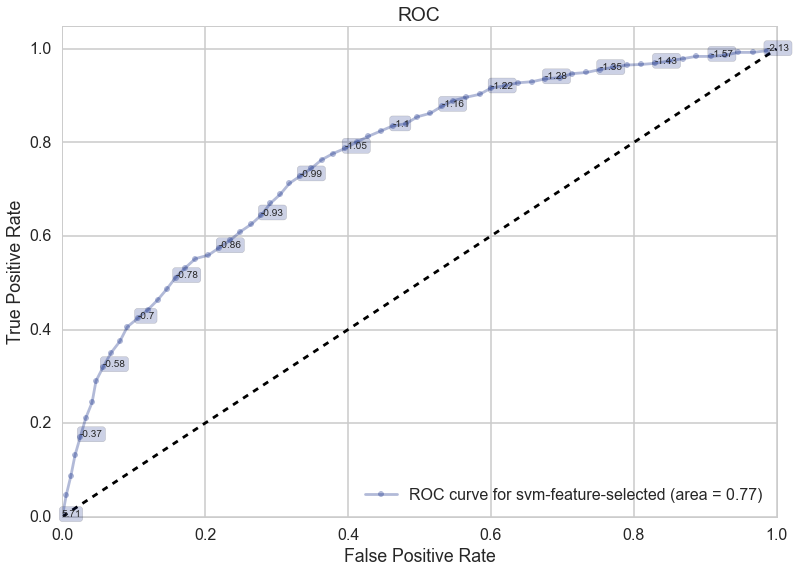

In [32]:
#CITATION: From HW3
with sns.color_palette("dark"):
    ax=make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, labe=200, skip=50, proba=False)

##### Low Graduation - No Gender/Ethnicity

In [33]:
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP_Low_Graduation'].values

In [34]:
#CITATION: From HW3
correlations=[]
dftousetrain=dftouse[mask]
for col in lcols:
    r=pearsonr(dftousetrain[col], dftousetrain['RESP_Low_Graduation'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
r_lunch_free,0.431374,0.431374
tfedrev_percent,0.309397,0.309397
tlocrev_percent,0.250340,-0.250340
tcurinst_percent,0.174324,-0.174324
r_frev_title1,0.170846,0.170846
r_ELL,0.162813,0.162813
tfedrev_pp,0.156278,0.156278
tsrev_percent,0.152960,0.152960
tcurssvc_percent,0.144028,0.144028


In [35]:
#CITATION: From HW3
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])

In [37]:
%%time
pipelinearsvm, Xtrain, ytrain, Xtest, ytest  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, 'RESP_Low_Graduation',1, mask=mask)
#CITATION: From HW3

using mask
BEST {'svm__C': 1.0} 0.792820241092 [mean: 0.78169, std: 0.00786, params: {'svm__C': 1e-05}, mean: 0.78050, std: 0.00383, params: {'svm__C': 0.001}, mean: 0.79176, std: 0.00184, params: {'svm__C': 0.01}, mean: 0.79216, std: 0.00221, params: {'svm__C': 0.1}, mean: 0.79282, std: 0.00218, params: {'svm__C': 1.0}, mean: 0.79176, std: 0.00391, params: {'svm__C': 10.0}, mean: 0.76858, std: 0.01030, params: {'svm__C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.79
Accuracy on test data:     0.78
[[2327   88]
 [ 617  204]]
########################################################
CPU times: user 8.27 s, sys: 138 ms, total: 8.4 s
Wall time: 8.54 s


/Users/ChaserAcer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [38]:
#CITATION: From HW3
np.array(lcols)[pipelinearsvm.get_params()['select'].get_support()]

array(['num_students', 'num_schools', 'num_pub_schools', 'tlocrev_pp',
       'tsrev_pp', 'tfedrev_pp', 'tcurinst_percent', 'tcuroth_percent',
       'tcurssvc_percent', 'tfedrev_percent', 'tlocrev_percent',
       'tsrev_percent', 'r_ELL', 'r_lunch_free', 'r_lrev_gst', 'r_lrev_it',
       'r_lrev_molr', 'r_srev_cbsp', 'r_frev_title1', 'r_frev_dis',
       'i_agency_type_local_school_district',
       'i_agency_type_charter_school_agency', 'i_ucl_city_large',
       'i_cs_all_charter', 'i_cs_all_noncharter'], 
      dtype='|S45')

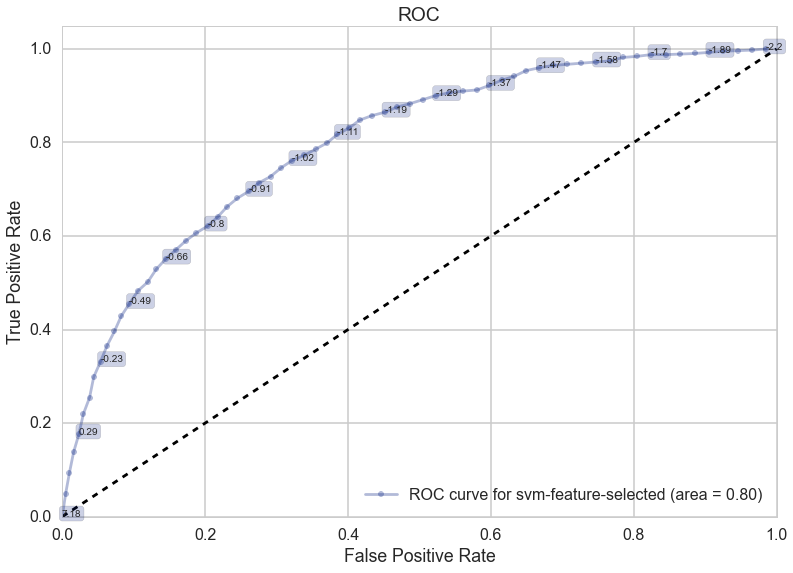

In [39]:
with sns.color_palette("dark"):
    ax=make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, labe=200, skip=50, proba=False)